#Homework_6
##Rafael Barrera Quiroz C.C. 1035433047
##Classify mnist_test.csv dataset with neuronal network

##Contenido
* [One Hot Encoding-Turn Off](#item1)
* [One Hot Encoding-Turn On](#item2)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df=pd.read_csv('mnist_test.csv')

In [3]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df_2=df[(df['label'] == 5)|(df['label'] == 7)]

In [5]:
df_2

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9982,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9988,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9990,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df2=df_2.to_numpy()

In [7]:
X_data=df2[:,1:]
y_data=df2[:,0]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

<a name="item1"></a>
#One Hot Encoding-Turn Off

##Optimizer:Adam-two layers

In [8]:
def Get_Model(element,X_train,y_train,X_test,y_test,learning_rate,epochs,loss):
  Model=Sequential([InputLayer(input_shape=element.shape),
                    Dense(units=16,activation='relu'),
                    Dense(units=10,activation='softmax')])
  
  Model.compile(loss=loss,optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])
  history=Model.fit(X_train,y_train,epochs=epochs,verbose=False)
  train_result=dict(zip(Model.metrics_names,Model.evaluate(X_train,y_train)))
  print('Train_accuracy=',train_result['accuracy'],'\t','Train_loss=',train_result['loss'])
  print('\n')

  fig, (ax1, ax2) =plt.subplots(1,2,figsize=(10,5))
  ax1.plot(history.history['accuracy'],label='accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax2.plot(history.history['loss'],label='loss')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  fig.suptitle('Accuracy and Loss', fontsize=16)
  plt.show()

  print('\n')
  test_result=dict(zip(Model.metrics_names,Model.evaluate(X_test, y_test)))
  return print('Test_accuracy=',test_result['accuracy'],'\t','Test_loss=',test_result['loss'])

###Variation of number of epochs from 10 to 60, and learning rate fixed at 0.1 with _Adam_ optimizer

---> Number epochs = 10 

48/48 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.9655
Train_accuracy= 0.9654948115348816 	 Train_loss= 0.13083761930465698




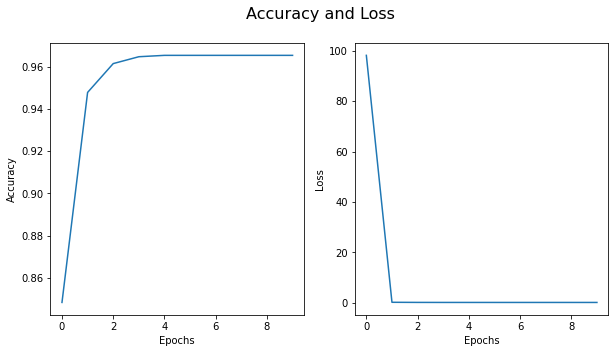



12/12 [==============================] - 0s 2ms/step - loss: 5.7110 - accuracy: 0.9609
Test_accuracy= 0.9609375 	 Test_loss= 5.710956573486328


---> Number epochs = 27 

48/48 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.9772
Train_accuracy= 0.9772135615348816 	 Train_loss= 0.03701159358024597




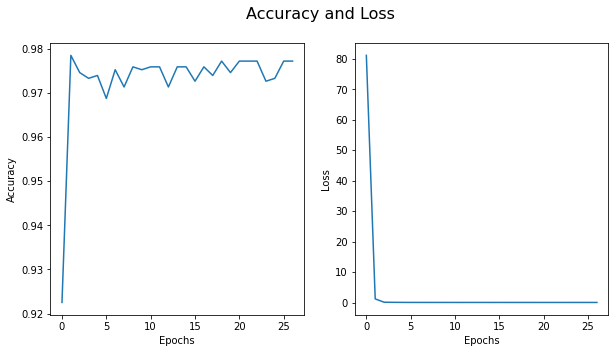



12/12 [==============================] - 0s 2ms/step - loss: 3.4329 - accuracy: 0.9557
Test_accuracy= 0.9557291865348816 	 Test_loss= 3.4329166412353516


---> Number epochs = 44 

48/48 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9655
Train_accuracy= 0.9654948115348816 	 Train_loss= 0.06567155569791794




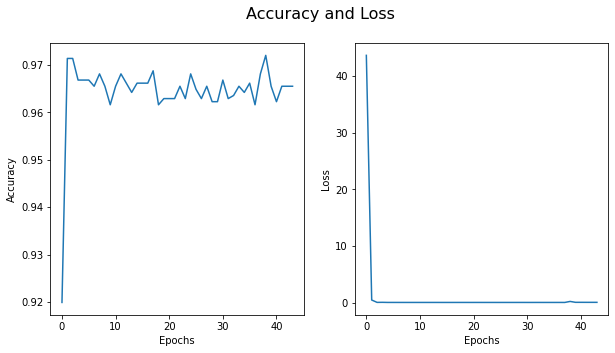



12/12 [==============================] - 0s 2ms/step - loss: 2.5113 - accuracy: 0.9427
Test_accuracy= 0.9427083134651184 	 Test_loss= 2.5112669467926025


---> Number epochs = 60 

48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 0.6933853626251221




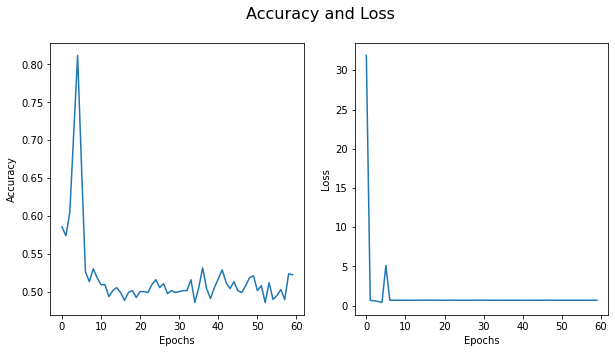



12/12 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 0.6814678311347961




In [9]:
pasos=np.ceil(np.linspace(10,60,4))
for i in range(len(pasos)):
  print('---> Number epochs =',int(pasos[i]),'\n')
  Get_Model(element=X_data[0],X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,learning_rate=0.1,\
            epochs=int(pasos[i]),loss='sparse_categorical_crossentropy')
  print('\n')

In [10]:
def Get_Model_1(element,X_train,y_train,X_test,y_test,epochs,loss):
  Model=Sequential([InputLayer(input_shape=element.shape),
                    Dense(units=16,activation='relu'),
                    Dense(units=10,activation='softmax')])
  
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10000,decay_rate=0.9)
  Model.compile(loss=loss,optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),metrics=['accuracy'])
  history=Model.fit(X_train,y_train,epochs=epochs,verbose=False)
  train_result=dict(zip(Model.metrics_names,Model.evaluate(X_train,y_train)))
  print('Train_accuracy=',train_result['accuracy'],'\t','Train_loss=',train_result['loss'])
  print('\n')

  fig, (ax1, ax2) =plt.subplots(1,2,figsize=(10,5))
  ax1.plot(history.history['accuracy'],label='accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax2.plot(history.history['loss'],label='loss')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  fig.suptitle('Accuracy and Loss', fontsize=16)
  plt.show()

  print('\n')
  test_result=dict(zip(Model.metrics_names,Model.evaluate(X_test, y_test)))
  return print('Test_accuracy=',test_result['accuracy'],'\t','Test_loss=',test_result['loss'])

###Exponential decay of learning rate using _tf.keras.optimizers.schedules.ExponentialDecay_

In [11]:
initial_learning_rate=1e-2
decay_steps=10000
decay_rate=0.9

def decayed_learning_rate(step):
  return initial_learning_rate*decay_rate**(step / decay_steps)

d_l_r=[]
epochs=35
Epochs=[i for i in range(epochs)]
for i in range(epochs):
  dlr=decayed_learning_rate(i)
  d_l_r.append(dlr)

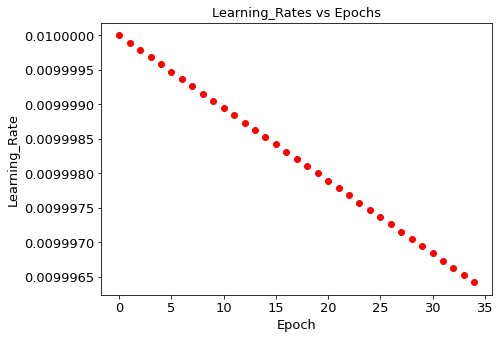

In [12]:
figure(figsize=(7,5))
plt.plot(Epochs,d_l_r,'ro')
plt.xlabel('Epoch',fontsize=13)
plt.ylabel('Learning_Rate',fontsize=13)
plt.title('Learning_Rates vs Epochs',fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

###Variation of number of epochs and learning rate exponential decay, with optimizer _Adam_

---> Number epochs = 10 

48/48 [==============================] - 0s 1ms/step - loss: 6.2024e-05 - accuracy: 1.0000
Train_accuracy= 1.0 	 Train_loss= 6.202403164934367e-05




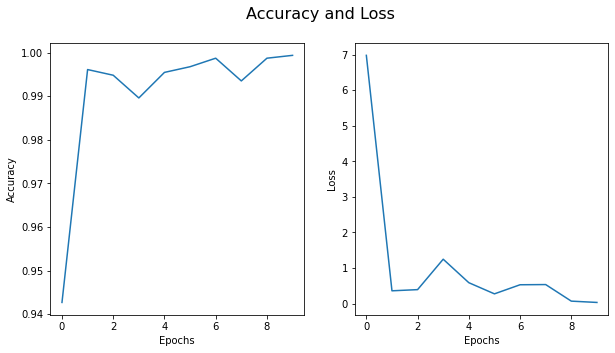



12/12 [==============================] - 0s 2ms/step - loss: 2.8684 - accuracy: 0.9896
Test_accuracy= 0.9895833134651184 	 Test_loss= 2.8684072494506836


---> Number epochs = 27 

48/48 [==============================] - 0s 1ms/step - loss: 2.2507e-09 - accuracy: 1.0000
Train_accuracy= 1.0 	 Train_loss= 2.2506942976008304e-09




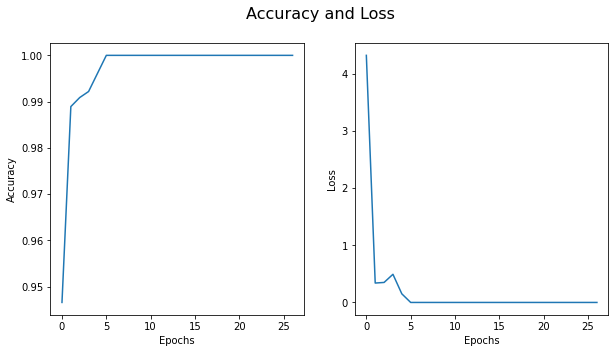



12/12 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.9896
Test_accuracy= 0.9895833134651184 	 Test_loss= 0.68511962890625


---> Number epochs = 44 

48/48 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Train_accuracy= 1.0 	 Train_loss= 0.0




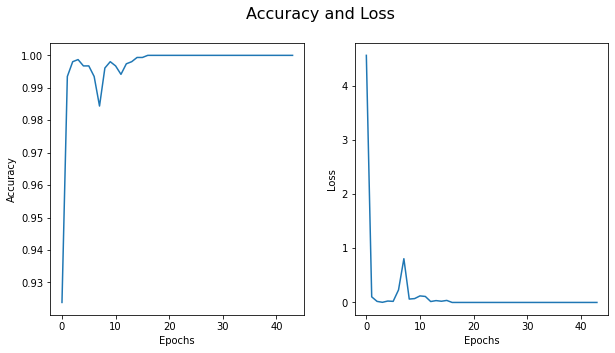



12/12 [==============================] - 0s 2ms/step - loss: 0.8115 - accuracy: 0.9948
Test_accuracy= 0.9947916865348816 	 Test_loss= 0.8114542961120605


---> Number epochs = 60 

48/48 [==============================] - 0s 1ms/step - loss: 3.8805e-10 - accuracy: 1.0000
Train_accuracy= 1.0 	 Train_loss= 3.880509524822884e-10




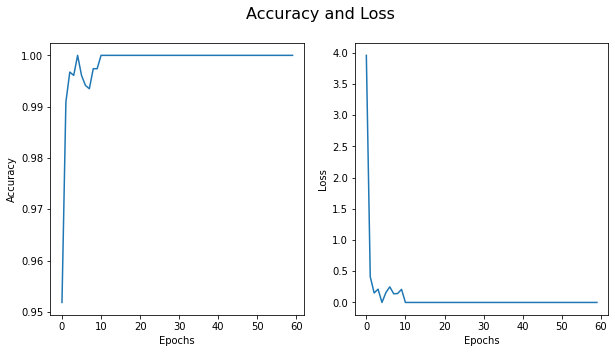



12/12 [==============================] - 0s 2ms/step - loss: 1.4904 - accuracy: 0.9896
Test_accuracy= 0.9895833134651184 	 Test_loss= 1.4903661012649536




In [13]:
pasos=np.ceil(np.linspace(10,60,4))
for i in range(len(pasos)):
  print('---> Number epochs =',int(pasos[i]),'\n')
  Get_Model_1(element=X_data[0],X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,epochs=int(pasos[i]),\
              loss='sparse_categorical_crossentropy')
  print('\n')

### El uso de un decaimiento exponencial en la tasa de aprendizaje representa una mejora para el _accuracy_

##Optimizer:SGD-three layers

In [14]:
def Get_Model_2(element,X_train,y_train,X_test,y_test,learning_rate,epochs,loss):
  Model=Sequential([InputLayer(input_shape=element.shape),
                    Dense(units=30,activation='relu'),
                    Dense(units=20,activation='relu'),
                    Dense(units=10,activation='softmax')])
  
  Model.compile(loss=loss,optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),metrics=['accuracy'])
  history=Model.fit(X_train,y_train,epochs=epochs,verbose=False)
  train_result=dict(zip(Model.metrics_names,Model.evaluate(X_train,y_train)))
  print('Train_accuracy=',train_result['accuracy'],'\t','Train_loss=',train_result['loss'])
  print('\n')

  fig, (ax1, ax2) =plt.subplots(1,2,figsize=(10,5))
  ax1.plot(history.history['accuracy'],label='accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax2.plot(history.history['loss'],label='loss')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  fig.suptitle('Accuracy and Loss', fontsize=16)
  plt.show()

  print('\n')
  test_result=dict(zip(Model.metrics_names,Model.evaluate(X_test, y_test)))
  return print('Test_accuracy=',test_result['accuracy'],'\t','Test_loss=',test_result['loss'])

###Variation number epochs from 10 to 60, learning rate fixed at 0.1, with optimizer _SGD_

---> Number epochs = 10 

48/48 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5247
Train_accuracy= 0.5247395634651184 	 Train_loss= 0.6941769123077393




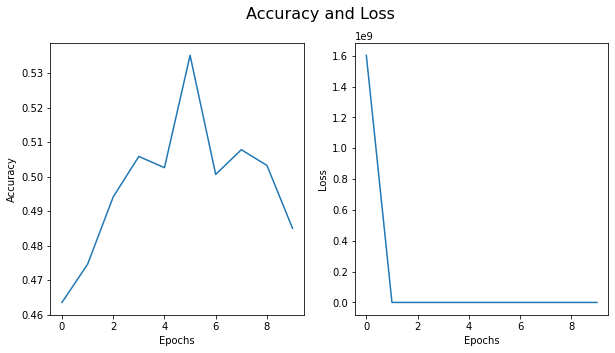



12/12 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 0.6870244145393372


---> Number epochs = 27 

48/48 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4772
Train_accuracy= 0.4772135317325592 	 Train_loss= 0.6948931217193604




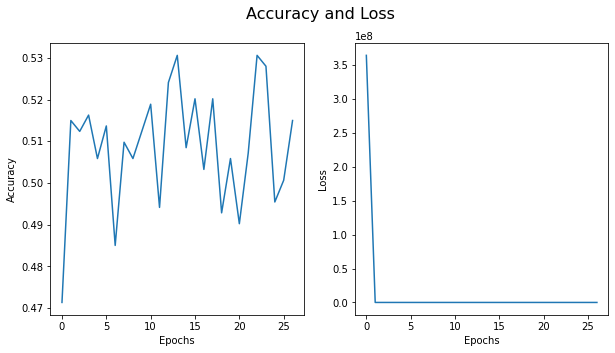



12/12 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4141
Test_accuracy= 0.4140625 	 Test_loss= 0.696679413318634


---> Number epochs = 44 

48/48 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4792
Train_accuracy= 0.4791666567325592 	 Train_loss= 0.6954889893531799




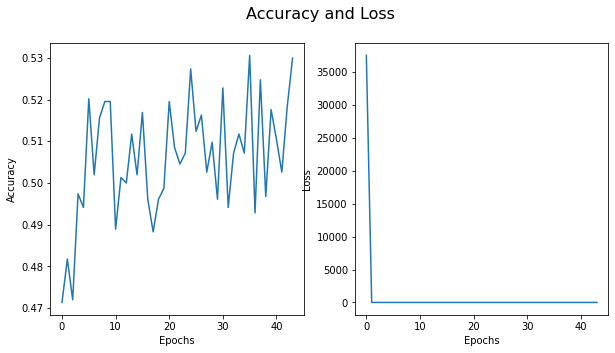



12/12 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.4141
Test_accuracy= 0.4140625 	 Test_loss= 0.7030002474784851


---> Number epochs = 60 

48/48 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 0.696439802646637




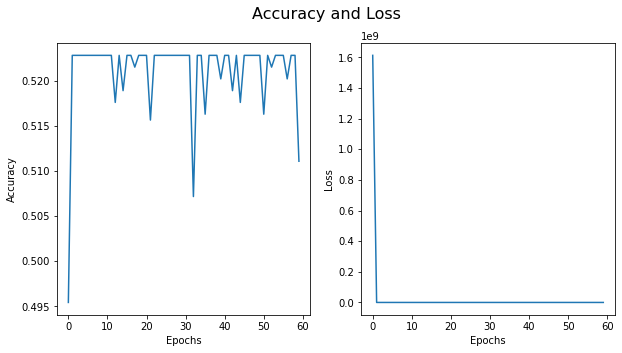



12/12 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 0.6879625916481018




In [15]:
pasos=np.ceil(np.linspace(10,60,4))
for i in range(len(pasos)):
  print('---> Number epochs =',int(pasos[i]),'\n')
  Get_Model_2(element=X_data[0],X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,learning_rate=0.1,epochs=int(pasos[i]),\
              loss='sparse_categorical_crossentropy')
  print('\n')

In [16]:
def Get_Model_3(element,X_train,y_train,X_test,y_test,epochs,loss):
  Model=Sequential([InputLayer(input_shape=element.shape),
                    Dense(units=16,activation='relu'),
                    Dense(units=10,activation='softmax')])
  
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10000,decay_rate=0.9)
  Model.compile(loss=loss,optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),metrics=['accuracy'])
  history=Model.fit(X_train,y_train,epochs=epochs,verbose=False)
  train_result=dict(zip(Model.metrics_names,Model.evaluate(X_train,y_train)))
  print('Train_accuracy=',train_result['accuracy'],'\t','Train_loss=',train_result['loss'])
  print('\n')

  fig, (ax1, ax2) =plt.subplots(1,2,figsize=(10,5))
  ax1.plot(history.history['accuracy'],label='accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax2.plot(history.history['loss'],label='loss')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  fig.suptitle('Accuracy and Loss', fontsize=16)
  plt.show()

  print('\n')
  test_result=dict(zip(Model.metrics_names,Model.evaluate(X_test, y_test)))
  return print('Test_accuracy=',test_result['accuracy'],'\t','Test_loss=',test_result['loss'])

###Variation number of epochs and learning rate exponential decay, with optimizer _SGD_

---> Number epochs = 10 

48/48 [==============================] - 0s 1ms/step - loss: 1.2116 - accuracy: 0.5241
Train_accuracy= 0.5240885615348816 	 Train_loss= 1.2115670442581177




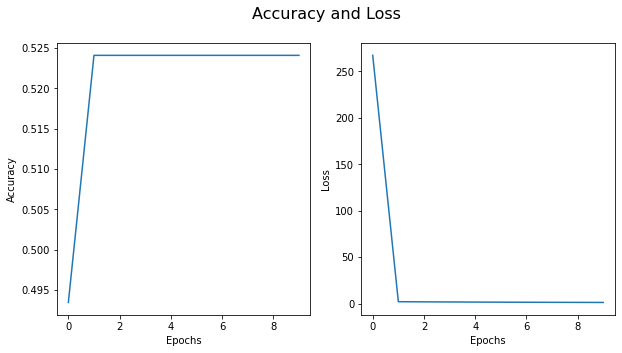



12/12 [==============================] - 0s 2ms/step - loss: 1.2128 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 1.2127572298049927


---> Number epochs = 27 

48/48 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.8490
Train_accuracy= 0.8489583134651184 	 Train_loss= 0.5217680931091309




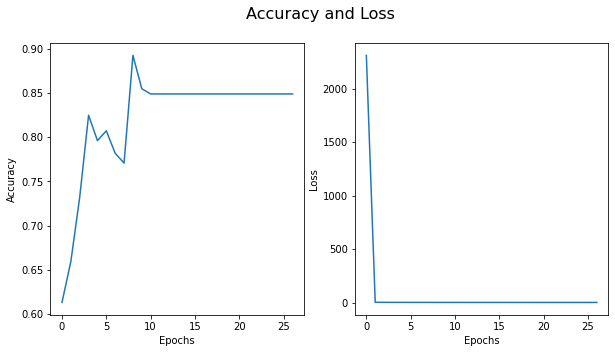



12/12 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.8672
Test_accuracy= 0.8671875 	 Test_loss= 0.5095286965370178


---> Number epochs = 44 

48/48 [==============================] - 0s 1ms/step - loss: 0.7908 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 0.7908360362052917




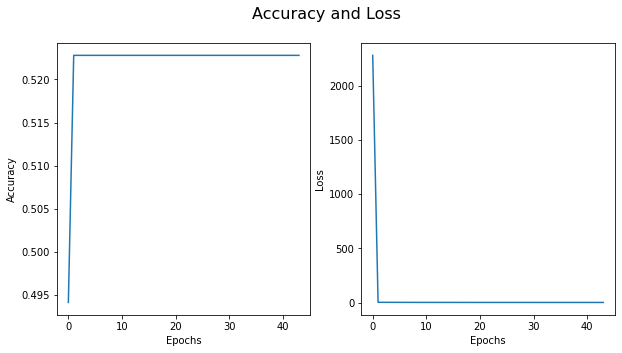



12/12 [==============================] - 0s 2ms/step - loss: 0.7843 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 0.7843164801597595


---> Number epochs = 60 

48/48 [==============================] - 0s 1ms/step - loss: 0.7629 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 0.7628868222236633




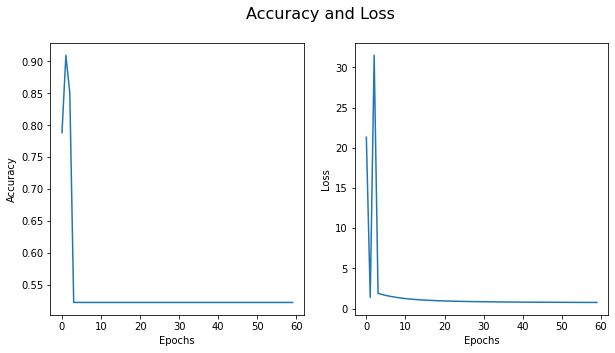



12/12 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 0.7566507458686829




In [17]:
pasos=np.ceil(np.linspace(10,60,4))
for i in range(len(pasos)):
  print('---> Number epochs =',int(pasos[i]),'\n')
  Get_Model_3(element=X_data[0],X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,epochs=int(pasos[i]),\
              loss='sparse_categorical_crossentropy')
  print('\n')

###Observe como el cambio de optimizer _Adam_ a optimizer _SGD_ representa una reducción del _accuracy_ de casi la mitad

<a name="item2"></a>
#One Hot Encoding-Turn On

In [18]:
y_train_one_hot_encoding=to_categorical(y_train, num_classes=10)
y_test_one_hot_encoding=to_categorical(y_test, num_classes=10)

##Optimizer: Adam

###Variation of number of epochs from 10 to 60, and learning rate fixed at 0.1 with _Adam_ optimizer

---> Number epochs = 10 

48/48 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Train_accuracy= 1.0 	 Train_loss= 0.0




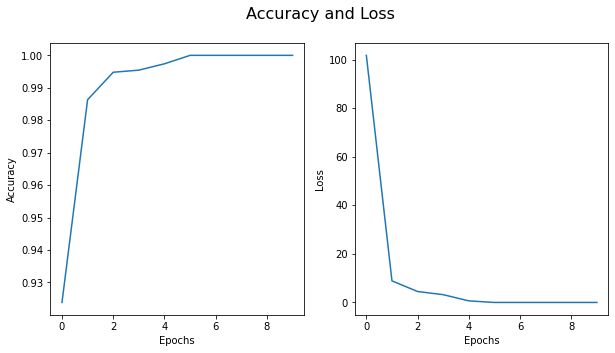



12/12 [==============================] - 0s 1ms/step - loss: 20.6174 - accuracy: 0.9896
Test_accuracy= 0.9895833134651184 	 Test_loss= 20.61740493774414


---> Number epochs = 27 

48/48 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.9993
Train_accuracy= 0.9993489384651184 	 Train_loss= 0.002199585782364011




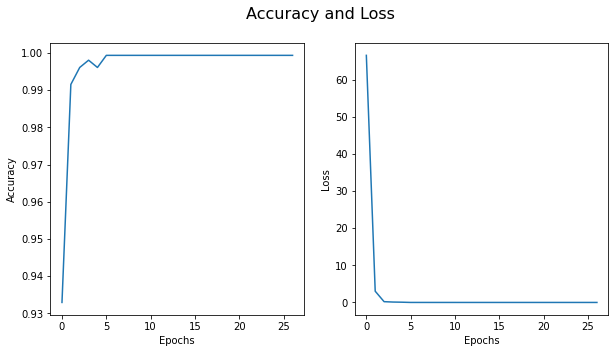



12/12 [==============================] - 0s 2ms/step - loss: 13.3346 - accuracy: 0.9896
Test_accuracy= 0.9895833134651184 	 Test_loss= 13.3345947265625


---> Number epochs = 44 

48/48 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9655
Train_accuracy= 0.9654948115348816 	 Train_loss= 0.05148003622889519




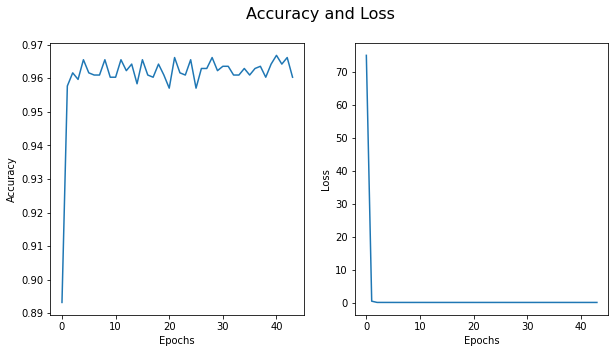



12/12 [==============================] - 0s 2ms/step - loss: 6.2486 - accuracy: 0.9557
Test_accuracy= 0.9557291865348816 	 Test_loss= 6.248620510101318


---> Number epochs = 60 

48/48 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9844
Train_accuracy= 0.984375 	 Train_loss= 0.027635665610432625




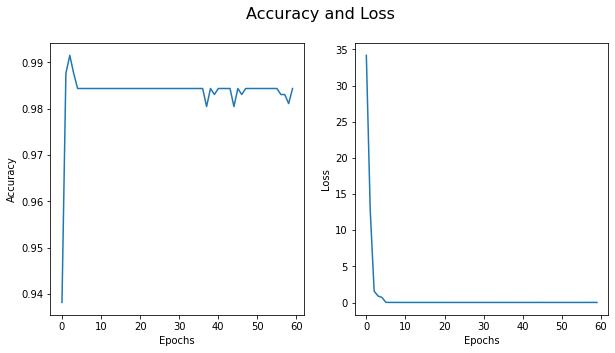



12/12 [==============================] - 0s 2ms/step - loss: 1.6331 - accuracy: 0.9818
Test_accuracy= 0.9817708134651184 	 Test_loss= 1.633148193359375




In [19]:
pasos=np.ceil(np.linspace(10,60,4))
for i in range(len(pasos)):
  print('---> Number epochs =',int(pasos[i]),'\n')
  Get_Model(element=X_data[0],X_train=X_train,y_train=y_train_one_hot_encoding,X_test=X_test,y_test=y_test_one_hot_encoding,\
            learning_rate=0.1,epochs=int(pasos[i]),loss='categorical_crossentropy')
  print('\n')

###Variation of number of epochs and learning rate exponential decay, with optimizer _Adam_

---> Number epochs = 10 

48/48 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9993
Train_accuracy= 0.9993489384651184 	 Train_loss= 0.003940432798117399




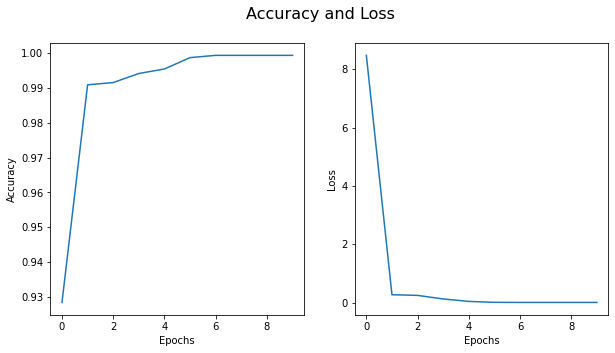



12/12 [==============================] - 0s 2ms/step - loss: 1.2633 - accuracy: 0.9844
Test_accuracy= 0.984375 	 Test_loss= 1.2632746696472168


---> Number epochs = 27 

48/48 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Train_accuracy= 1.0 	 Train_loss= 0.0




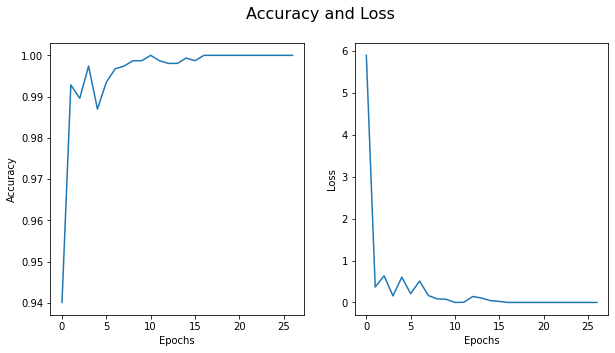



12/12 [==============================] - 0s 2ms/step - loss: 1.8093 - accuracy: 0.9922
Test_accuracy= 0.9921875 	 Test_loss= 1.8092623949050903


---> Number epochs = 44 

48/48 [==============================] - 0s 1ms/step - loss: 6.2088e-10 - accuracy: 1.0000
Train_accuracy= 1.0 	 Train_loss= 6.208814018471287e-10




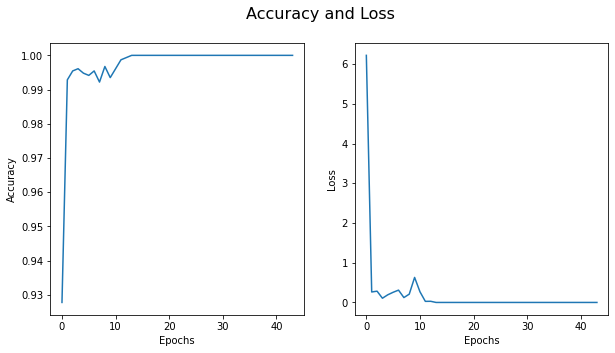



12/12 [==============================] - 0s 2ms/step - loss: 2.6698 - accuracy: 0.9766
Test_accuracy= 0.9765625 	 Test_loss= 2.6698267459869385


---> Number epochs = 60 

48/48 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9753
Train_accuracy= 0.9752604365348816 	 Train_loss= 0.10135149955749512




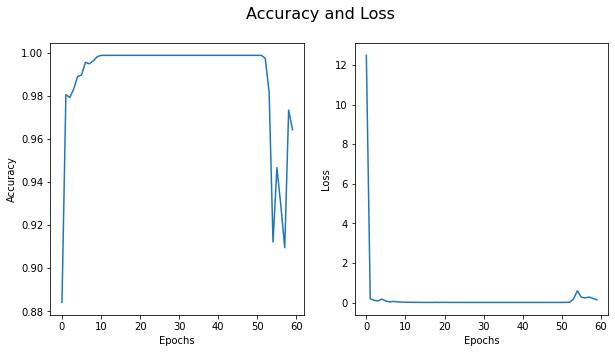



12/12 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9740
Test_accuracy= 0.9739583134651184 	 Test_loss= 0.12176290899515152




In [20]:
pasos=np.ceil(np.linspace(10,60,4))
for i in range(len(pasos)):
  print('---> Number epochs =',int(pasos[i]),'\n')
  Get_Model_1(element=X_data[0],X_train=X_train,y_train=y_train_one_hot_encoding,X_test=X_test,y_test=y_test_one_hot_encoding,\
              epochs=int(pasos[i]),loss='categorical_crossentropy')
  print('\n')

##Optimizer:SGD-three layers

###Variation of number of epochs from 10 to 60, and learning rate fixed at 0.1 with _SGD_ optimizer

---> Number epochs = 10 

48/48 [==============================] - 0s 2ms/step - loss: 0.7308 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 0.7307841777801514




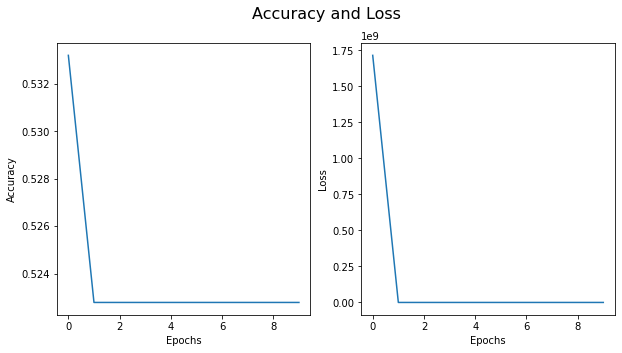



12/12 [==============================] - 0s 2ms/step - loss: 0.7239 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 0.7238593101501465


---> Number epochs = 27 

48/48 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 0.70455402135849




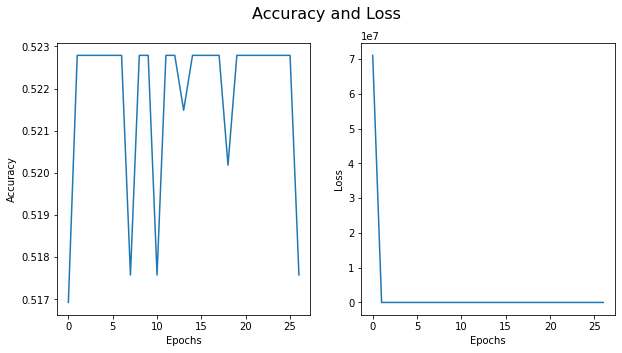



12/12 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 0.6977271437644958


---> Number epochs = 44 

48/48 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.4772
Train_accuracy= 0.4772135317325592 	 Train_loss= 0.6803751587867737




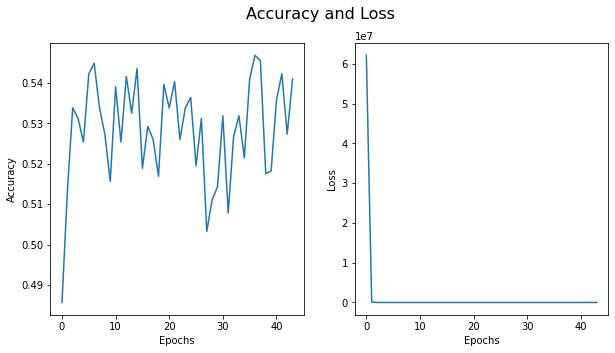



12/12 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4141
Test_accuracy= 0.4140625 	 Test_loss= 0.6927462220191956


---> Number epochs = 60 

48/48 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 0.6979305744171143




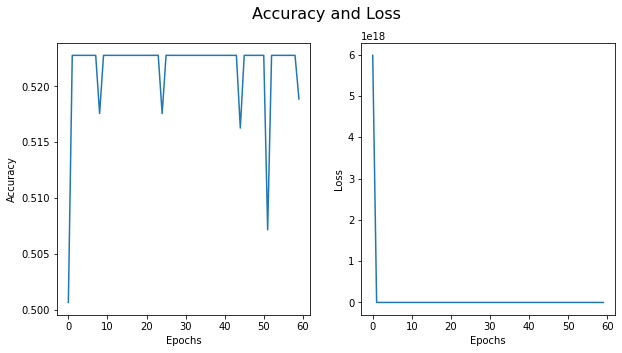



12/12 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 0.6905973553657532




In [21]:
pasos=np.ceil(np.linspace(10,60,4))
for i in range(len(pasos)):
  print('---> Number epochs =',int(pasos[i]),'\n')
  Get_Model_2(element=X_data[0],X_train=X_train,y_train=y_train_one_hot_encoding,X_test=X_test,y_test=y_test_one_hot_encoding,\
              learning_rate=0.1,epochs=int(pasos[i]),loss='categorical_crossentropy')
  print('\n')

###Variation of number of epochs and learning rate exponential decay, with optimizer _SGD_

---> Number epochs = 10 

48/48 [==============================] - 0s 2ms/step - loss: 1.2121 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 1.2120667695999146




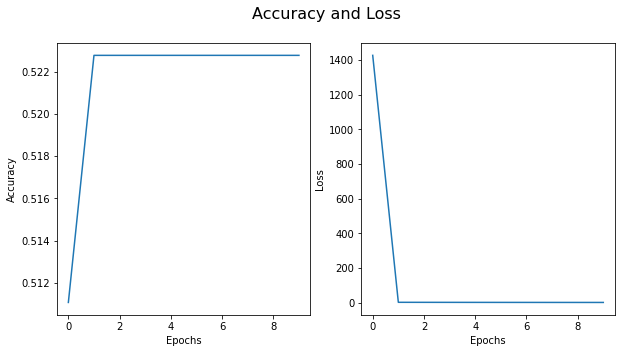



12/12 [==============================] - 0s 2ms/step - loss: 1.2040 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 1.2039748430252075


---> Number epochs = 27 

48/48 [==============================] - 0s 1ms/step - loss: 0.8672 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 0.8672179579734802




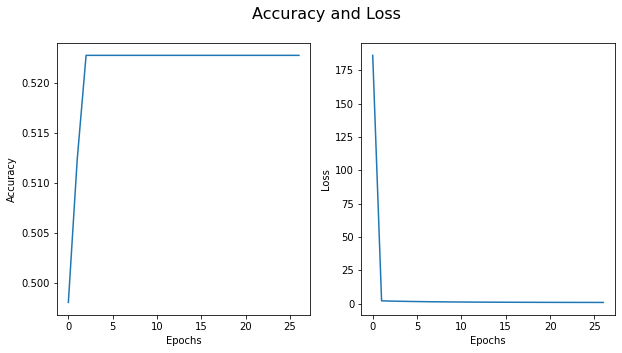



12/12 [==============================] - 0s 2ms/step - loss: 0.8600 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 0.8600115776062012


---> Number epochs = 44 

48/48 [==============================] - 0s 1ms/step - loss: 0.7908 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 0.7907722592353821




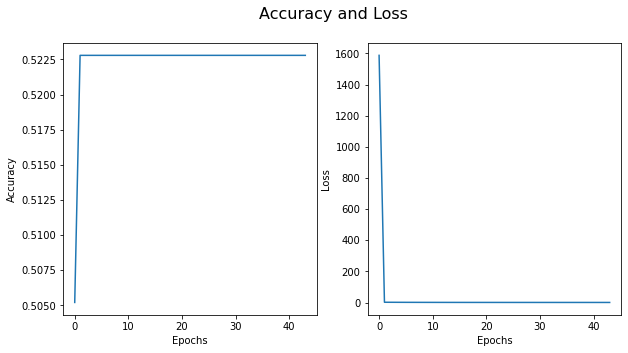



12/12 [==============================] - 0s 2ms/step - loss: 0.8269 - accuracy: 0.5833
Test_accuracy= 0.5833333134651184 	 Test_loss= 0.8268613815307617


---> Number epochs = 60 

48/48 [==============================] - 0s 1ms/step - loss: 0.7625 - accuracy: 0.5228
Train_accuracy= 0.5227864384651184 	 Train_loss= 0.7624905705451965




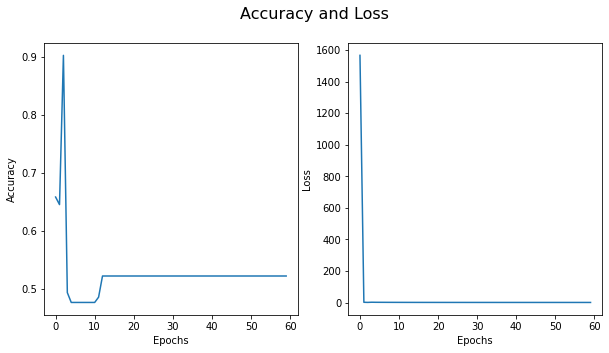



12/12 [==============================] - 0s 2ms/step - loss: 0.7564 - accuracy: 0.5859
Test_accuracy= 0.5859375 	 Test_loss= 0.7563679814338684




In [22]:
pasos=np.ceil(np.linspace(10,60,4))
for i in range(len(pasos)):
  print('---> Number epochs =',int(pasos[i]),'\n')
  Get_Model_3(element=X_data[0],X_train=X_train,y_train=y_train_one_hot_encoding,X_test=X_test,y_test=y_test_one_hot_encoding,\
              epochs=int(pasos[i]),loss='categorical_crossentropy')
  print('\n')

### El uso de One hot encoding para _target_ no represento mayor diferencia, tanto con el uso de optimizar _Adam_ como de optimizer _SGD_